In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from matplotlib import cm
import mne
import pandas as pd

SMALL_SIZE = 12
MEDIUM_SIZE = 17
BIGGER_SIZE = 22

plt.style.use('ggplot')

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
cols2skip = [10,11,12,14,20]  
rows2skip = [1,2,53,54,55,56,57,58] 
cols = [i for i in range(26) if i not in cols2skip]
data_info = pd.read_excel('data/CP_participants_rakib(n=50).xlsx', sheet_name='Sheet1', 
                          skiprows=rows2skip,
                         usecols=cols)
columns = ['Subjects#', 'Session Date', 'Sex', 'Age', 'Ed.', 'Edinburgh Hand Score (%)', 
           'Yrs of music training', 'Onset Age of music', 'Languages other than English',
          'Primary Instrument(s)', 'Behavioral Slope (b1)']

ident_columns = ['ident vw{}'.format(i+1) for i in range(5)]
rt_columns = ['rt vw{}'.format(i+1) for i in range(5)]
columns.extend(ident_columns)
columns.extend(rt_columns)
data_info.columns = columns

data_info.to_csv('particpants_info.csv')

In [3]:
Sex = data_info['Sex']
M = len(Sex.where(Sex == 'M').dropna())
F = len(Sex.where(Sex == 'F').dropna())
sex = [M,F]

yrs = data_info[['Age', 'Ed.', 'Yrs of music training']]

M_rt = data_info.query("Sex == 'M'")[rt_columns]
F_rt = data_info.query("Sex == 'F'")[rt_columns]

M_ident = data_info.query("Sex == 'M'")[ident_columns]
F_ident = data_info.query("Sex == 'F'")[ident_columns]

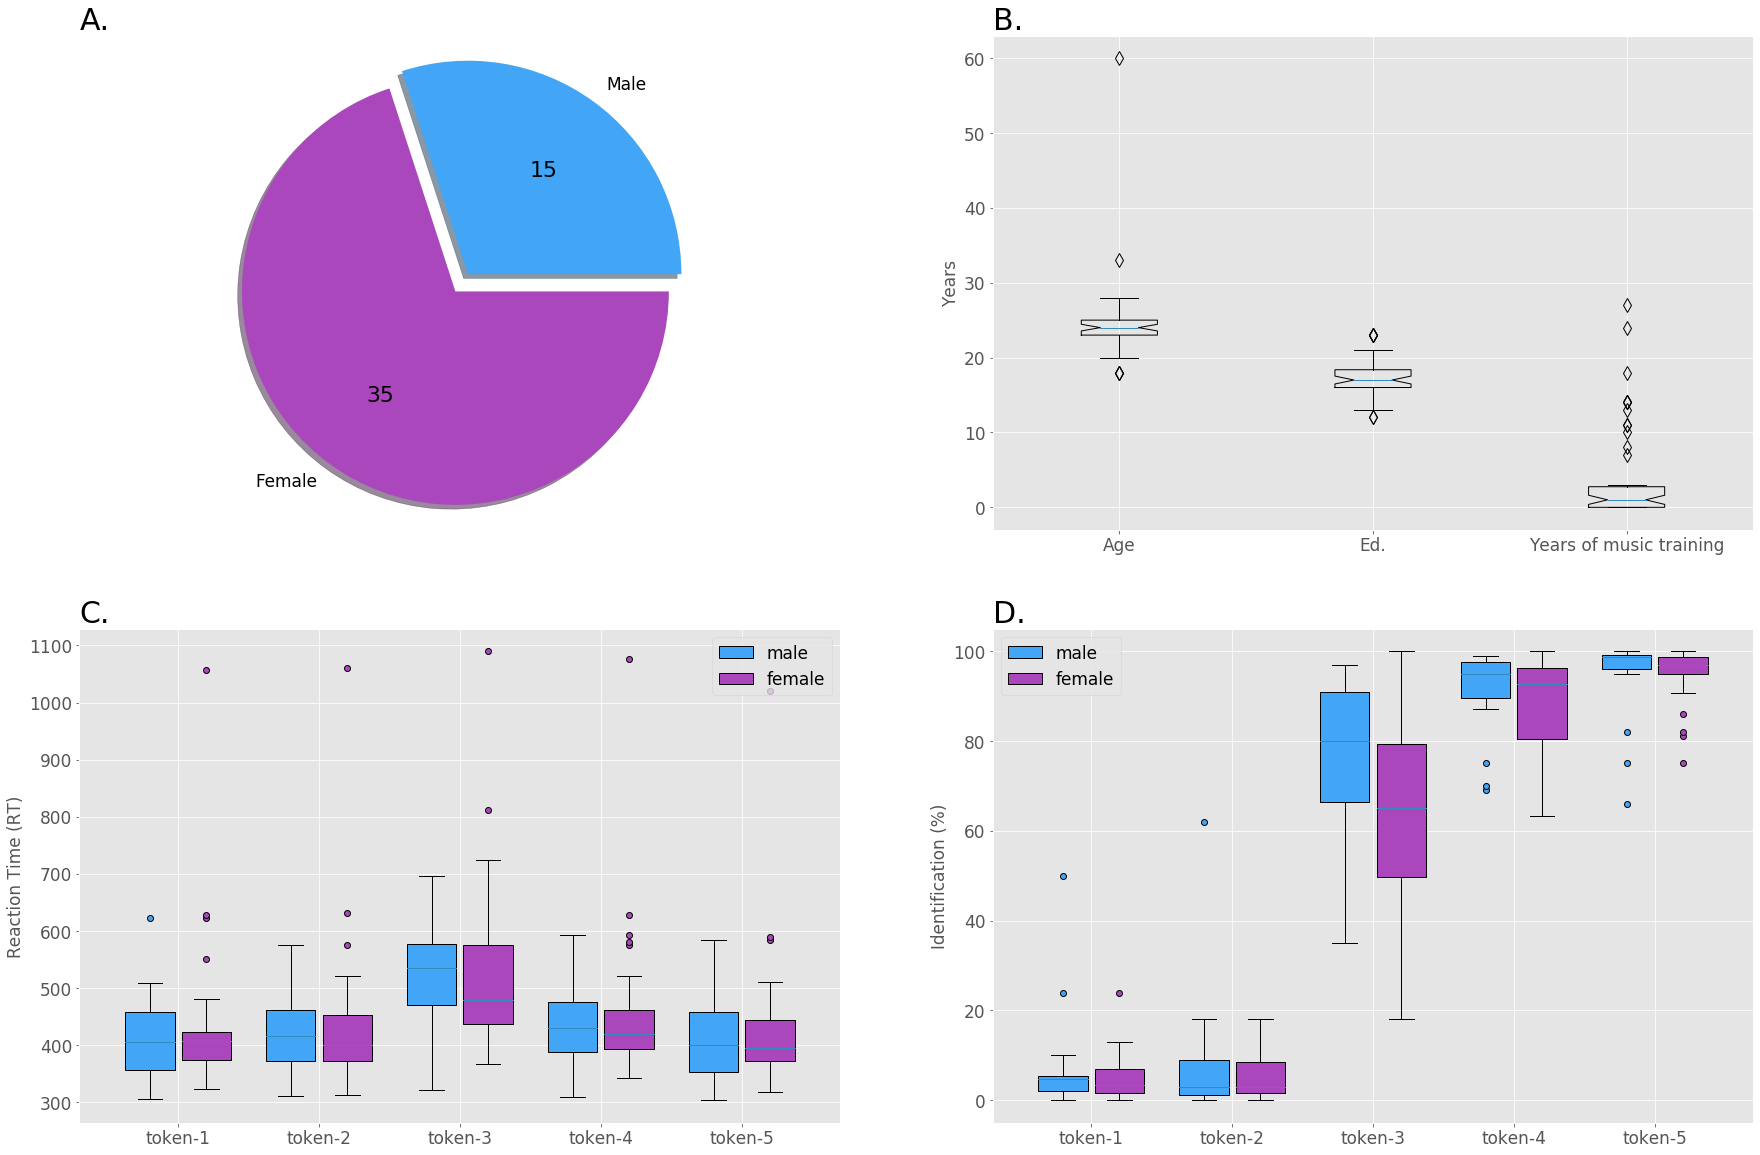

In [4]:
m_color = "#42A5F5"
f_color = "#AB47BC"
plt.figure(figsize=(30, 20))

plt.subplot(221)
plt.title('A.', loc='left', fontdict={'size': 30})
explode = (0, 0.1)
plt.pie(sex, labels=['Male', 'Female'], explode=explode, shadow=True, colors=[m_color, f_color],
        autopct=lambda val: np.round(val/100. * sum(sex), 0).astype(int))
plt.axis('equal')

plt.subplot(222)
plt.title('B.', loc='left', fontdict={'size': 30})
plt.boxplot(yrs.values, notch=True, labels=['Age',  'Ed.', 'Years of music training'], 
            flierprops={'markersize':10, 'marker':'d', 'c':'r'})
plt.ylabel("Years")

plt.subplot(223)
plt.title('C.', loc='left', fontdict={'size': 30})
mbox = plt.boxplot(M_rt.values, positions=[1,2,3,4,5], widths=0.35, patch_artist=True)
fbox = plt.boxplot(F_rt.values, positions=[1.4,2.4,3.4,4.4,5.4], widths=0.35, patch_artist=True)

ticks = [1.2, 2.2, 3.2, 4.2, 5.2]
ticklabels = ["token-{}".format(i+1) for i in range(5)]
plt.xticks(ticks, ticklabels)
plt.ylabel("Reaction Time (RT)")

plt.setp(mbox['boxes'], facecolor=m_color)
plt.setp(mbox['fliers'], markerfacecolor=m_color)
plt.setp(fbox['boxes'], facecolor=f_color)
plt.setp(fbox['fliers'], markerfacecolor=f_color)

plt.legend([mbox["boxes"][0], fbox["boxes"][0]], ['male', 'female'], loc='upper right')

plt.subplot(224)
plt.title('D.', loc='left', fontdict={'size': 30})
mbox = plt.boxplot(M_ident.values * 100, positions=[1,2,3,4,5], widths=0.35, patch_artist=True)
fbox = plt.boxplot(F_ident.values * 100, positions=[1.4,2.4,3.4,4.4,5.4], widths=0.35, patch_artist=True)

plt.xticks(ticks, ticklabels)
plt.ylabel("Identification (%)")

plt.setp(mbox['boxes'], facecolor=m_color)
plt.setp(mbox['fliers'], markerfacecolor=m_color)
plt.setp(fbox['boxes'], facecolor=f_color)
plt.setp(fbox['fliers'], markerfacecolor=f_color)

plt.legend([mbox["boxes"][0], fbox["boxes"][0]], ['male', 'female'], loc='upper left')
plt.show()

In [7]:
data_info.mean(), data_info.median()

(Age                          24.440000
 Ed.                          17.380000
 Edinburgh Hand Score (%)     80.071600
 Yrs of music training         3.961600
 Onset Age of music            6.307692
 Behavioral Slope (b1)         5.691079
 ident vw1                     0.060067
 ident vw2                     0.062133
 ident vw3                     0.681333
 ident vw4                     0.887800
 ident vw5                     0.948933
 rt vw1                      428.532000
 rt vw2                      430.131000
 rt vw3                      522.867000
 rt vw4                      450.051000
 rt vw5                      424.331000
 dtype: float64, Age                          24.000000
 Ed.                          17.000000
 Edinburgh Hand Score (%)     90.000000
 Yrs of music training         1.000000
 Onset Age of music            7.000000
 Behavioral Slope (b1)         3.454255
 ident vw1                     0.036667
 ident vw2                     0.030000
 ident vw3              